Welcome to this interactive python session. This should be considered supplementary content to the chapter. We would strongly advise you to read the chapter before trying the hands-on sessions.

This session will look at the intuition behind convolution.

We encourage you to play around with the numbers and the images as much as possible to get a good feel for the topic. Come to your own conclusions and let us know if you observe some interesting behaviour!

In [0]:
import numpy as np
import scipy.signal as sc
from tabulate import tabulate
import matplotlib.pyplot as plt

#Vertical Edge detection using convolution

Base image and kernel

In [4]:
base = np.array([[10,10,10,0,0,0,0,0,0],[10,10,10,0,0,0,0,0,0],[10,10,10,0,0,0,0,0,0],[10,10,10,0,0,0,0,0,0],[10,10,10,0,0,0,0,0,0],[10,10,10,0,0,0,0,0,0]])
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print("Say our image is:")
print(tabulate(base, tablefmt="fancy_grid"))
print("And, the kernel is:")
print(tabulate(kernel, tablefmt="fancy_grid"))


Say our image is:
╒════╤════╤════╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘════╧════╧════╧═══╧═══╧═══╧═══╧═══╧═══╛
And, the kernel is:
╒═══╤═══╤════╕
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
╘═══╧═══╧════╛


Convolution (cross-correlation) using scipy

In [5]:
output=sc.correlate2d(base,kernel,mode='valid')
# why cross-correlate? remember convolution in deep learning explanations is actually the cross-correlation operation
print("output is:")
print(tabulate(output, tablefmt="fancy_grid"))

output is:
╒═══╤════╤════╤═══╤═══╤═══╤═══╕
│ 0 │ 30 │ 30 │ 0 │ 0 │ 0 │ 0 │
├───┼────┼────┼───┼───┼───┼───┤
│ 0 │ 30 │ 30 │ 0 │ 0 │ 0 │ 0 │
├───┼────┼────┼───┼───┼───┼───┤
│ 0 │ 30 │ 30 │ 0 │ 0 │ 0 │ 0 │
├───┼────┼────┼───┼───┼───┼───┤
│ 0 │ 30 │ 30 │ 0 │ 0 │ 0 │ 0 │
╘═══╧════╧════╧═══╧═══╧═══╧═══╛


plot the results

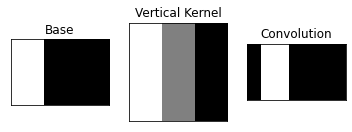

In [6]:
plt.subplot(131),plt.imshow(base,cmap='gray'),plt.title('Base')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(kernel,cmap='gray'),plt.title('Vertical Kernel')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output,cmap='gray'),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

#Horizontal edge detection using convolution

Using the same base image as before but with a horizontal edge detector kernel

base image is
╒════╤════╤════╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├────┼────┼────┼───┼───┼───┼───┼───┼───┤
│ 10 │ 10 │ 10 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘════╧════╧════╧═══╧═══╧═══╧═══╧═══╧═══╛
And, the Horizonatal edge detector kernel is:
╒════╤════╤════╕
│  1 │  1 │  1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│ -1 │ -1 │ -1 │
╘════╧════╧════╛
output is
╒═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╛


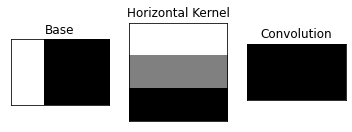

In [7]:

horizontalKernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
horizontalOutput=sc.correlate2d(base,horizontalKernel,mode='valid')

print("base image is")
print(tabulate(base, tablefmt="fancy_grid"))
print("And, the Horizonatal edge detector kernel is:")
print(tabulate(horizontalKernel, tablefmt="fancy_grid"))
print("output is")
print(tabulate(horizontalOutput, tablefmt="fancy_grid"))

plt.subplot(131),plt.imshow(base,cmap='gray'),plt.title('Base')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(horizontalKernel,cmap='gray'),plt.title('Horizontal Kernel')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(horizontalOutput,cmap='gray'),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

Using a different base image now with the horizontal edge detector kernel

base image is
╒════╤════╤════╤════╤════╤════╤════╤════╤════╕
│  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ 10 │ 10 │ 10 │ 10 │ 10 │ 10 │ 10 │ 10 │ 10 │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │  0 │
╘════╧════╧════╧════╧════╧════╧════╧════╧════╛
And, the Horizonatal edge detector kernel is:
╒════╤════╤════╕
│  1 │  1 │  1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│ -1 │ -1 │ -1 │
╘════╧════╧════╛
output is
╒═════╤═════╤═════╤═════╤═════╤═════╤═════╕
│   0 │   0 │   0 │   0 │   0 │   0 │   0 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ -30 │ -30 │ -30 │ -30 │ -30 │ -30 │ -30 │
├─────┼─────┼─────┼─────

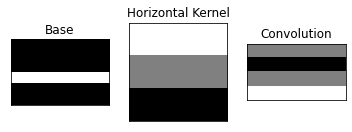

In [8]:

horizontalBase = np.array([[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[10,10,10,10,10,10,10,10,10],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0]])

horizontalKernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
horizontalOutput=sc.correlate2d(horizontalBase,horizontalKernel,mode='valid')

print("base image is")
print(tabulate(horizontalBase, tablefmt="fancy_grid"))
print("And, the Horizonatal edge detector kernel is:")
print(tabulate(horizontalKernel, tablefmt="fancy_grid"))
print("output is")
print(tabulate(horizontalOutput, tablefmt="fancy_grid"))

plt.subplot(131),plt.imshow(horizontalBase,cmap='gray'),plt.title('Base')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(horizontalKernel,cmap='gray'),plt.title('Horizontal Kernel')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(horizontalOutput,cmap='gray'),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()